### What is a Hyperplane?

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

At first approximation what SVMs do is to find a separating line(or hyperplane) between data of two classes. SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible.

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
Image(url= "https://miro.medium.com/max/800/1*irg_jfdAar9gfe0j-Q04vQ.png")

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

-------------------------------------------------------------------------------------------------------------------------------

**_A hyperplane in an n-dimensional Euclidean space is a flat, n-1 dimensional subset of that space that divides the space into two disconnected parts._**

# SVM with Online Shopper's Intention Dataset

#### Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

#### Attribute Information:
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [3]:
# import dependencies
import pandas as pd
# To see the displays of the datasets better
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
# read in the dataset
df = pd.read_csv("online_shoppers_intention.csv")

In [5]:
# look at the lenght of the dataset and the columns
df.shape

(12330, 18)

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
# check all the unique values and their counts for each column
for col in df.columns:
    print('Column name: ', col)
    print(df[col].value_counts())

Column name:  Administrative
0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64
Column name:  Administrative_Duration
0.000000      5857
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
73.300000        1
294.070513       1
90.875000        1
97.333333        1
526.850000       1
Name: Administrative_Duration, Length: 3336, dtype: int64
Column name:  Informational
0.0     9686
1.0     1041
2.0      727
3.0      380
4.0      222
5.0       99
6.0       78
7.0       36
9.0       15
8.0       14
10.0       7
12.0       5
14.0       2
11.0       1
16.0       1
24.0       1
13.0       1
Name: Informational, dtype: int

In [8]:
# look at the columns which unique values are 5 or less
for col in df.columns:
    if len(df[col].value_counts()) <= 12:
        print(df[col].value_counts())

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
False    9462
True     2868
Name: Weekend, dtype: int64
False    10422
True      1908
Name: Revenue, dtype: int64


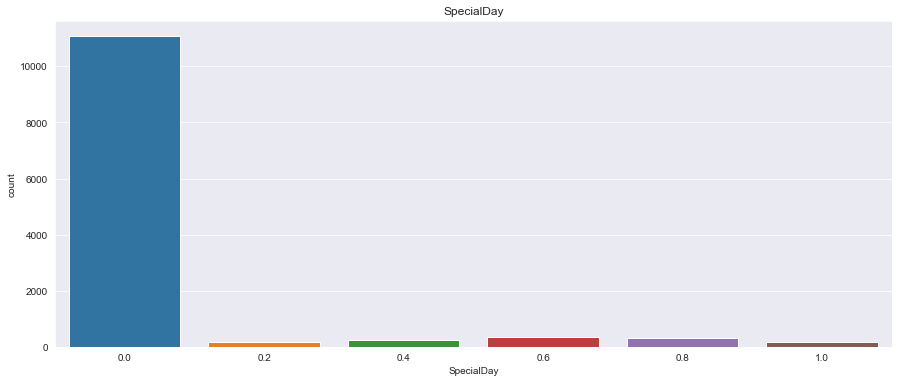

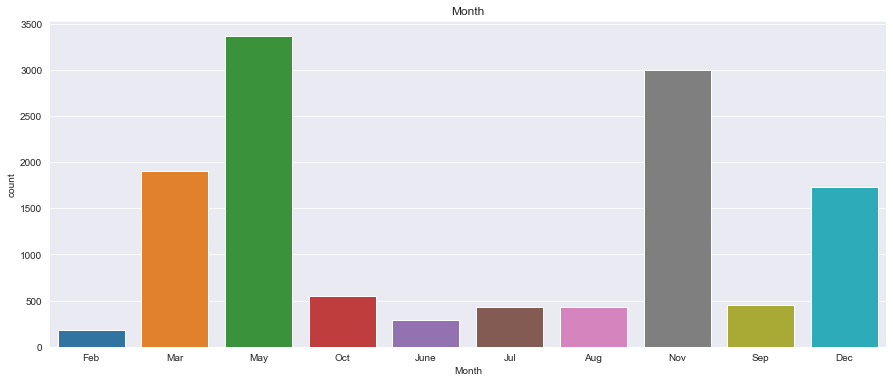

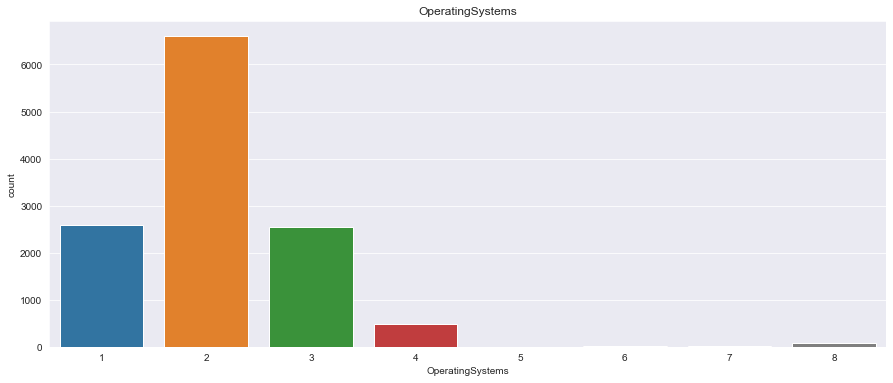

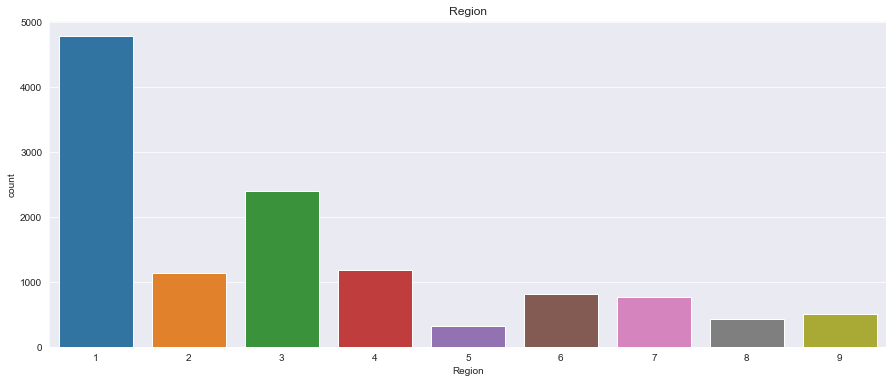

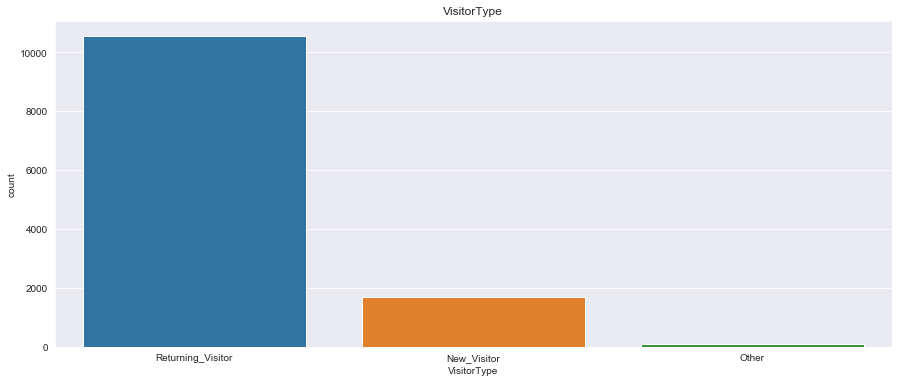

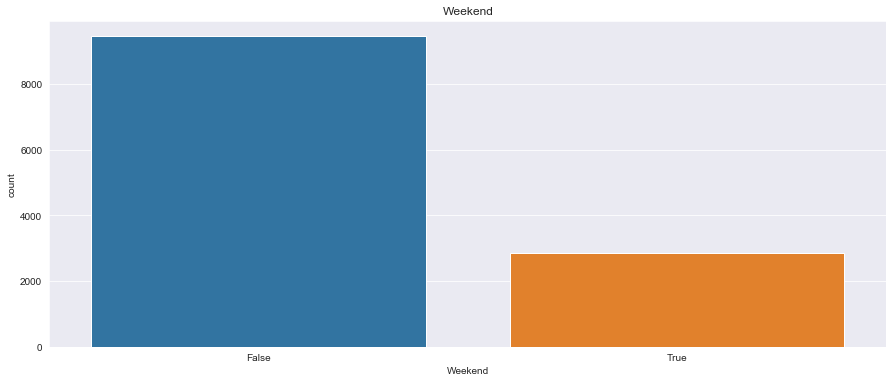

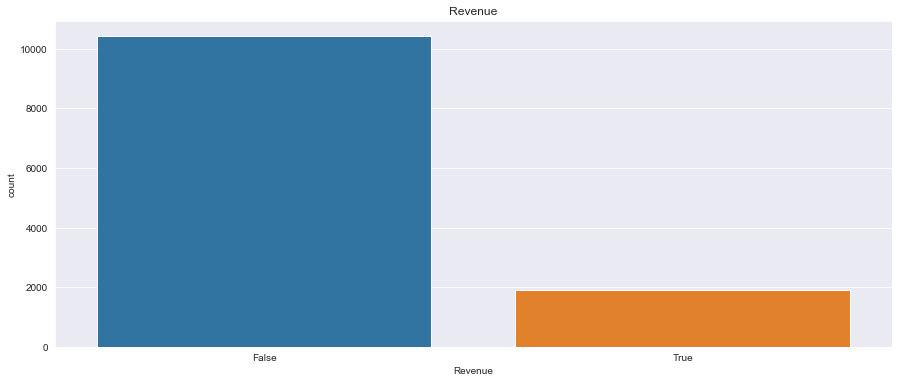

In [9]:
# EDA

for col in df.columns:
    if len(df[col].value_counts()) <= 12:
        plt.figure(figsize=(15,6))
        sns.countplot(df[col])
        plt.title(col)

In [10]:
# check to see if there are missing values
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [11]:
# description of the data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
# description of the data where the '_Duration' columns have the value of "-1"
df[df.Administrative_Duration == -1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,33.000000,33.0,33.0,33.0,33.0,33.0,33.000000,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.060606,-1.0,0.0,-1.0,1.0,-1.0,0.181818,0.188889,0.0,0.048485,2.060606,2.575758,3.484848,3.515152
std,0.242306,0.0,0.0,0.0,0.0,0.0,0.058387,0.036004,0.0,0.158353,0.863836,2.000473,2.501515,3.717536
min,0.000000,-1.0,0.0,-1.0,1.0,-1.0,0.000000,0.066667,0.0,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.000000,2.000000,2.000000,3.000000,3.000000
75%,0.000000,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.000000,3.000000,2.000000,4.000000,3.000000
max,1.000000,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.600000,4.000000,10.000000,9.000000,20.000000


In [13]:
# impute the missing values with 0
df.fillna(0, inplace = True)

In [14]:
# one hot encoding 
df1 = pd.get_dummies(df)
df1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

# label encoding of revenue
label_encoder = LabelEncoder()
df['Revenue'] = label_encoder.fit_transform(df['Revenue'])
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [16]:
# getting dependent and independent variables
x = df1

# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)
y = df['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [17]:
from sklearn.model_selection import train_test_split

# prepare train and validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [18]:
# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


In [19]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(x_train, y_train).predict(x_test)

#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

LinearSVC accuracy :  0.7001892403352258


C:\Users\ezell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### StandardScaler+GridSearch+PCA+SMOTE

In [20]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # Pipeline with GridSearch and StandardScaler with __PCA__
# pipe = Pipeline([
#         ('scale', StandardScaler()),
#         ('reduce_dims', PCA(n_components=4)),
#         ('clf', SVC(kernel = 'linear', C = 1, gamma = 'scale'))])

# param_grid_smote = dict(reduce_dims__n_components=[8,10,12,14],
#                   clf__C=np.logspace(-1, 2, 4),
#                   clf__kernel=['rbf','linear'],
#                   clf__gamma=[1, 0.1, 0.01, 0.001])

# # Create a train/valid only for GridSearch so you don't overfit on valid
# X_for_gridsearch, X_future_validation, y_for_gridsearch, y_future_validation = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

# grid = GridSearchCV(pipe, param_grid=param_grid_smote, cv=3, n_jobs=1, verbose=2, scoring= 'accuracy')
# grid.fit(X_for_gridsearch, y_for_gridsearch)

# # View the accuracy score
# print('Best score for grid_data:', grid.best_score_) 

# # View the best parameters for the model found using grid search
# print('Best params:',grid.best_params_) 

In [21]:
# from imblearn.over_sampling import SMOTE

# # SMOTE ??
# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(random_state=2)
# x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

# print('After OverSampling, the shape of x_train: {}'.format(x_train_res.shape))
# print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [22]:
# # Pipeline with GridSearch and StandardScaler with __PCA__ and __SMOTE__
# pipe_smote = Pipeline([
#         ('scale', StandardScaler()),
#         ('reduce_dims', PCA(n_components=4)),
#         ('clf', SVC(kernel = 'linear', C = 1, gamma = 'scale'))])

# param_grid_smote = dict(reduce_dims__n_components=[8,10,12,14,16],
#                   clf__C=np.logspace(-1, 2, 4),
#                   clf__kernel=['rbf','linear'],
#                   clf__gamma=[1, 0.1, 0.01, 0.001])

# # Create a train/valid only for GridSearch so you don't overfit on valid
# X_for_gridsearch_sm, X_future_validation_sm, y_for_gridsearch_sm, y_future_validation_sm = train_test_split(x_train_res, y_train_res, test_size=0.15, random_state=1)

# grid_smote = GridSearchCV(pipe_smote, param_grid=param_grid_smote, cv=3, n_jobs=1, verbose=2, scoring= 'accuracy')
# grid_smote.fit(X_for_gridsearch_sm, y_for_gridsearch_sm)

# # View the accuracy score
# print('Best score for grid_data:', grid_smote.best_score_) 

# # View the best parameters for the model found using grid search
# print('Best params:',grid_smote.best_params_) 

In [23]:
# feature_scaler = StandardScaler()
# x_train_res = feature_scaler.fit_transform(x_train_res)
# x_test = feature_scaler.transform(x_test)

# # Make PCA
# pca = PCA(n_components=10, whiten=True)
# pca.fit(x_train_res)
# x_train_pca = pca.transform(x_train_res)

# from time import time
# # Run SVC with best params
# t0 = time()
# clf = SVC(C=10, kernel='rbf', gamma=0.1, random_state= 123)
# clf.fit(x_train_pca, y_train_res)
# print("done in %0.3fs" % (time() - t0))

# # Display result
# print('score ', clf.score(pca.transform(x_test), y_test))

In [24]:
# from imblearn.combine import SMOTEENN
# # Edited Nearest Neighbours
# smote_enn = SMOTEENN(random_state=2)
# X_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

In [25]:
# X_resampled = feature_scaler.fit_transform(X_resampled)

# # Make PCA
# pca2 = PCA(n_components=10, whiten=True)
# pca2.fit(X_resampled)
# x_train_pca2 = pca2.transform(X_resampled)

# from time import time
# # Run SVC with best params
# t0 = time()
# clf2 = SVC(C=10, kernel='rbf', gamma=0.1, random_state= 123)
# clf2.fit(x_train_pca2, y_resampled)
# print("done in %0.3fs" % (time() - t0))

# # Display result
# print('score ', clf2.score(pca2.transform(x_test), y_test))

## Best Score

In [28]:
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# With cross-val
x2 = df1[df1.Administrative_Duration != -1]
x2.index = range(len(x2.index))

y2 = x2['Revenue']
x2 = x2.drop(['Revenue'], axis = 1)

smote_enn = SMOTEENN(random_state=2)
X_resampled, y_resampled = smote_enn.fit_resample(x2, y2)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.33, random_state = 123)

pca3 = PCA(n_components=10, whiten=True)
pca3.fit(X_train)
x_pca = pca3.transform(X_train)

clf3 = SVC(C=10, kernel='rbf', gamma=0.1, random_state= 123)
scores = cross_val_score(clf3, x_pca, y_train, cv=10)
clf3.fit(x_pca, y_train)

print(scores)
print('score ', clf3.score(pca3.transform(X_test), y_test))

[0.9212963  0.92407407 0.93796296 0.92592593 0.92592593 0.93148148
 0.9212963  0.92585728 0.9304912  0.92956441]
score  0.9276179733032525


### With StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler

# With cross-val
x2 = df1[df1.Administrative_Duration != -1]
x2.index = range(len(x2.index))

y2 = x2['Revenue']
x2 = x2.drop(['Revenue'], axis = 1)

X_resampled, y_resampled = smote_enn.fit_resample(x2, y2)
feature_scaler = StandardScaler()
X_resampled = feature_scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.33, random_state = 123)


pca3 = PCA(n_components=10, whiten=True)
pca3.fit(X_train)
x_pca = pca3.transform(X_train)

clf3 = SVC(C=10, kernel='rbf', gamma=0.1, random_state= 123)
scores = cross_val_score(clf3, x_pca, y_train, cv=10)
clf3.fit(x_pca, y_train)

print(scores)
print('score ', clf3.score(pca3.transform(X_test), y_test))

[0.91851852 0.91388889 0.91851852 0.91759259 0.91944444 0.92685185
 0.90462963 0.91380908 0.92585728 0.91010195]
score  0.9193457416807671


Dropping the rows where the duration values were "-1" also seems to help with accuracy
 +
Seems like StandardScaler is hurting my accuracy so without it the accuracy is a tiny bit higher.